# Проект: принятие решений в бизнесе

**Цель исследования:** используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами

**Описание проекта:** Проведена приоритизация гипотез по фреймворкам ICE и RICE. Проведен анализ
результатов A/B-теста, построин графики кумулятивной выручки, среднего чека,
конверсии по группам, а посчитана статистическую значимость различий конверсий
и средних чеков по сырым и очищенным данным. На основании анализа нами было
принято решение о нецелесообразности дальнейшего проведения теста.


**Описание данных:**

Файл /datasets/hypothesis.csv. 

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv. 

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. 

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Контекст**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


**План проекта:**

1. Обзор данных

2. Приоритизация гипотез.

2.1. Применение фреймворка ICE для приоритизации гипотез.

2.2. Применение фреймворка RICE для приоритизации гипотез. 

3. Анализ A/B-теста

3.1. График кумулятивной выручки по группам. 

3.2. График кумулятивного среднего чека по группам. 

3.3. График относительного изменения кумулятивного среднего чека группы B к группе A. 

3.4. График кумулятивного среднего количества заказов на посетителя по группам. 

3.5. График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

3.6. Точечный график количества заказов по пользователям.

3.7. Расчет 95-й и 99-й перцентили количества заказов на пользователя. 

3.8. Точечный график стоимостей заказов. 

3.9. Расчет 95-й и 99-й перцентили стоимости заказов. 

3.10. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

3.12. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

3.13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

3.14. Выводы по результатам теста.

4. Общий вывод



## Обзор данных

In [1]:
#Импортируем небходимые библиотеки. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
#Считаем данные из csv-файлов в датафрейм и сохраняем в переменную
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [3]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [4]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [5]:
pd.set_option('display.max_colwidth', None) #выводим первые 10 строчек ДФ чтобы было видно всю информацию внутри ячеек
data.head(10)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
data.isna().sum() #Проверим, есть ли в датафреймах пропуски значений.

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [12]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [13]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [14]:
print('Найдено дубликатов - ', data.duplicated().sum()) #Проверим, есть ли в датафреймах явные дубликаты строк.

Найдено дубликатов -  0


In [15]:
print('Найдено дубликатов - ', orders.duplicated().sum())

Найдено дубликатов -  0


In [16]:
print('Найдено дубликатов - ', visitors.duplicated().sum())

Найдено дубликатов -  0


In [17]:
#переводим названия столбцов в нижний регистр
data.columns = data.columns.str.lower()

In [18]:
#переводим названия столбцов в змеиный регистр
orders.columns = orders.columns.str.replace('transactionId', 'transaction_id')
orders.columns = orders.columns.str.replace('visitorId', 'visitor_id')

In [19]:
data.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [20]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [21]:
#приводим данные из столбцов дата в соответсвующий формат
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Посмотрим равны ли группы по кличеству посещений и заказов

In [22]:
print ('Количество посещений в группе А -', visitors.query('group == "A"')['visitors'].sum()) 
print ('Количество посещений в группе B -',visitors.query('group == "B"')['visitors'].sum()) 

print('-----------------------------------') 
print ('Количество заказов в группе А -', orders.query('group == "A"').shape[0]) 
print ('Количество заказов в группе B -', orders.query('group == "B"').shape[0])


Количество посещений в группе А - 18736
Количество посещений в группе B - 18916
-----------------------------------
Количество заказов в группе А - 557
Количество заказов в группе B - 640


In [23]:
print ('Различие количества пользователей в группах, %', 100-(visitors.query('group == "A"')['visitors'].sum()/visitors.query('group == "B"')['visitors'].sum()*100))

Различие количества пользователей в группах, % 0.9515753859166836


Количество пользователей в различных группах различается не более, чем на 1%

Проверяем не попали ли одни и те же пользователи в разные группы А/В теста.

In [24]:
#группируем пользователей по группам и считаем уникальные значения
df = orders.groupby('visitor_id').agg({'group': 'nunique'})
print('Кол-во пользователей, попавших в обе группы теста ', df.query('group > 1').shape[0])

Кол-во пользователей, попавших в обе группы теста  58


Попавший в одну из групп посетитель должен оставаться в этой группе до конца теста. Если пользователь принимает участие в тестировании обоих гипотез в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно. 

**Выводы:** нами были проанализированны данные по трем дата фреймам. Пропусков значений и полных дубликатов строк не найдено. Количество пользователей в различных группах различается не более, чем на 1%, что является статистически допустимым.

Было обнаружено, что 58 пользователей одновременно оказались в двух группах теста. При реально проводимом тесте, данная ошибка привела бы к ничтожности его результата. Тест было бы необходимо остановить и провести заново, при усиленном контроле возникновения данной ошибки вновь. Поскольку это учебный проект, отступим от данного требования.

## Приоритизация гипотез.
### Фреймворк ICE для приоритизации гипотез. 


In [25]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Таким образом, 8, 0 и 7 гипотезы являются приоритетными при модели скоринга ICE

### Фреймворк ICE для приоритизации гипотез.

In [26]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


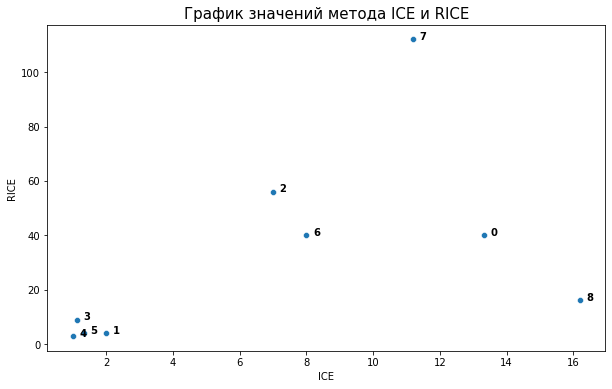

In [27]:

plt.figure(figsize=(10,6))
plt.title('График значений метода ICE и RICE', size=15)
sns.scatterplot(x=data['ICE'], y=data['RICE'])
for line in range(0,data.shape[0]):
     plt.text(data.ICE[line]+0.2, 
              data.RICE[line], 
              data.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

При применении модели приоретизации RICE в топе 7, 2 и 0 гипотезы. 

**Выводы:** при применении различных скоринговых моделей RICE и ICE в топе у нас разные гипотезы: ICE - 8, 0 и 7 гипотезы, RICE  в приоритете 7, 2 и 0. 

Различие в приоритете гипотез при применении RICE и ICE обусловлено парметром Reach (Охват пользователей). 
Парметром Reach позволяет избежать предвзятости и ответить на вопрос: сколько пользователей затронут изменения? Модель RICE позволяет оценить данный вопрос, соответственно в топ выходят гипотезы, затрагивающие максимальное количество пользователей.

## Анализ A/B-теста

### График кумулятивной выручки по группам.

In [28]:
#группируем заказы по датам и группам
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head(10)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
66,2019-08-01,B
85,2019-08-22,B
86,2019-08-22,A
124,2019-08-17,A
125,2019-08-17,B


In [29]:
#считаем коммулятивные количество заказов, пользователей и выручку, совершенных в дату для каждой группы
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head()



,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [30]:
#Считаем количество посещений с нарастанием итога
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [31]:
#соединяем дата фреймы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#указываем новое название столбцов
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]


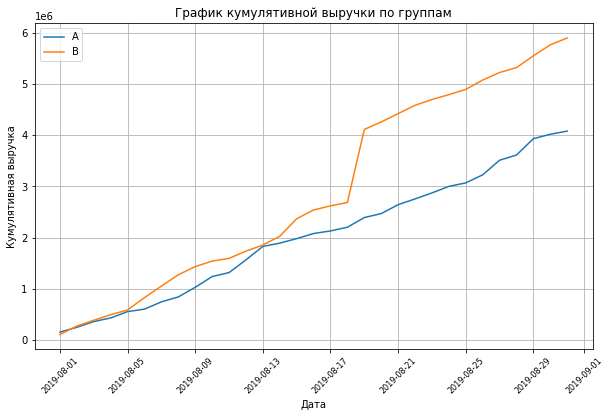

In [32]:
plt.figure(figsize=(10,6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.tick_params(axis='x', labelsize=8)
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

По графику прослеживается лидирование группы В по размеру кумулятивной выручки. Определяется скачок значений выручки 18-19 августа, что может говорить об аномально большом заказе или их количестве.

### График кумулятивного среднего чека по группам. 

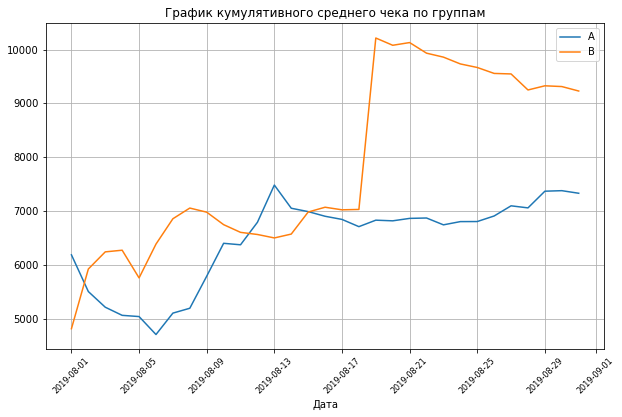

In [33]:
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.tick_params(axis='x', labelsize=8)
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

На данном графике так же прослеживается скачок значений группы В 18 августа, в группе А - 13 августа. Видно, что в эти даты были совершены крупные, не типичные заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

Результаты теста менялись значительно в несколько дат. Вероятно именно тогда были совершенны аномальные заказы.

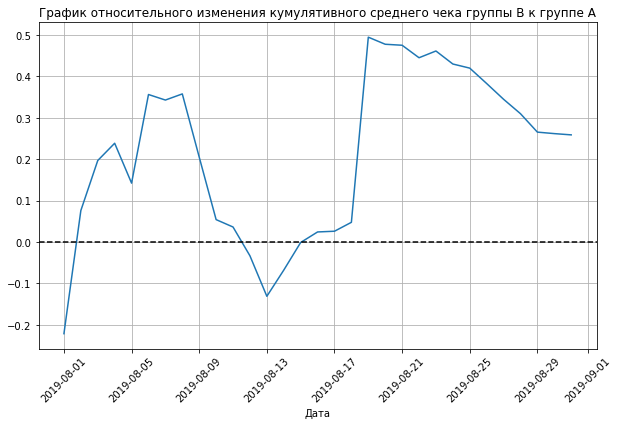

In [34]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=45)

plt.show()

На графике видно, что средний чек группы В, не всегда превышает средничий чек группы А. Группа В по значению среднего чека не может закрепится на одном уровне, это может объсняется анамально большими заказми.

### График кумулятивного среднего количества заказов на посетителя по группам. 

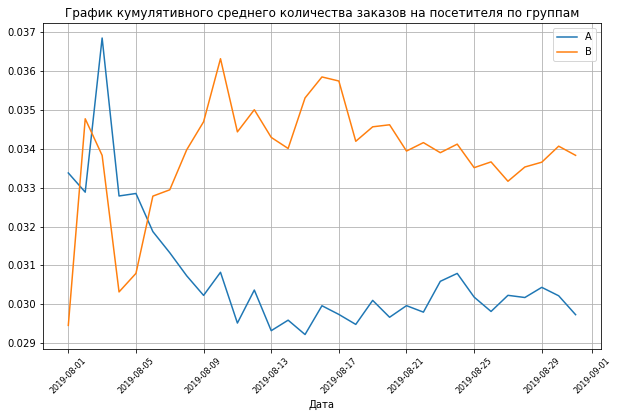

In [35]:
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')

plt.tick_params(axis='x', labelsize=8)
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

Пользователи группы В делают в среднем большее количество заказов.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

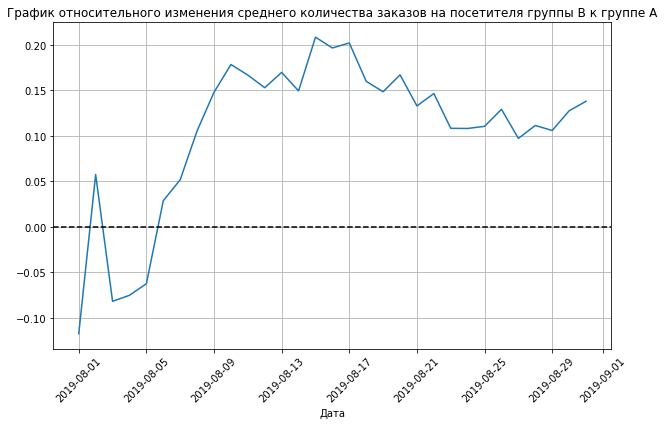

In [36]:
plt.figure(figsize=(10,6))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.grid()
plt.title('График относительного изменения среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=45)

plt.show()

С начала теста по количеству заказов на посетителя лидировала группа А. с 5 по 9 августа произошло резкое увеличение среднего количества заказов  на покупателя в группе В, что может говорить либо о большом количестве заказов, сделанных группой В, либо об уменьшении количества регистрируемых пользователей.

### Точечный график количества заказов по пользователям.

In [37]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


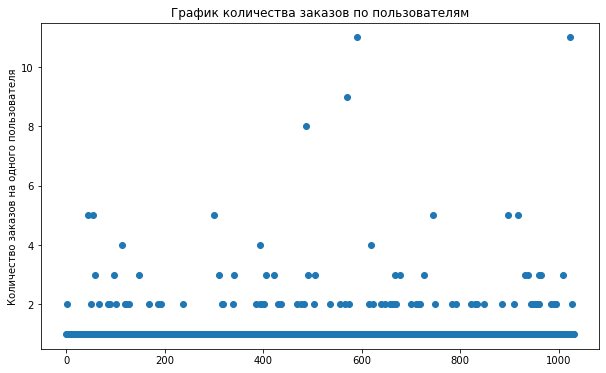

In [38]:
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов на одного пользователя')
plt.show()

Есть пользователи, совершающие большее количество заказов. 

### Расчет 95-й и 99-й перцентили количества заказов на пользователя.

In [39]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

95 % пользователей делают 1-2 заказа, 99 % пользователей совершают до 4 заказов. Определим аномальных пользователей - совершающих более 4 заказов, создадим переменную per_orders.

In [40]:
per_orders = np.percentile(ordersByUsers['orders'], [95])

### Точечный график стоимостей заказов.

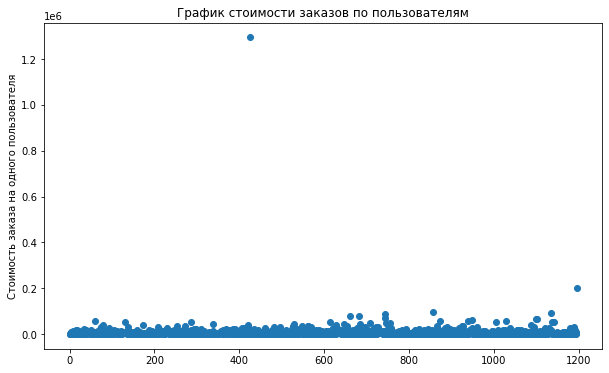

In [41]:
plt.figure(figsize=(10,6))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов по пользователям')
plt.ylabel('Стоимость заказа на одного пользователя')
plt.show()

По графику мы также видим аномально большие по сумме заказы.

### Расчет 95-й и 99-й перцентили стоимости заказов. 

In [42]:
np.percentile(orders['revenue'], [95, 99])


array([28000. , 58233.2])

95 % пользователей делают заказы на сумму до 28000, 99 % пользователей совершают заказы на сумму до 58233.2. Определим аномальных пользователей - совершающих заказы на сумму до 28000, создадим переменную per_revenue.

In [43]:
per_revenue = np.percentile(orders['revenue'], [95])

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

Определим нулевую гипотезу Н0 - различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

Альтернативная гипотеза Н1 - различиz в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

Уровень статистической значимости aльфа установим - 0,05

In [44]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [45]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = .05

print('P-value равен {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост в среднем количестве заказов на посетителя {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

if (stats.mannwhitneyu(sampleA, sampleB)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

P-value равен 0.017
Относительный прирост в среднем количестве заказов на посетителя 0.138
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве двух групп отвергнута. По результатам обработки "сырых" данных статистически значимые различия между группами А и В есть. Относительный прирост в среднем количестве заказов на посетителя группы B к группе А равен 13.8%, что говорит о лидировании группы В по количеству заказов на посетителя.


### Статистическая значимость различий в среднем чеке между группами по «сырым» данным. 

Определим нулевую гипотезу Н0 -различий в среднем чеке между группами по «сырым» данным нет.

Альтернативная гипотеза Н1 - различия в среднем чеке между группами по «сырым» данным есть. 

Уровень статистической значимости aльфа установим - 0,05

In [46]:
alpha = .05

print('P-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека между группами {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

P-value 0.729
Относительное различие среднего чека между группами 0.259
Не отвергаем нулевую гипотезу


Поскольку уровень статистической значимости равен 0.729, что больше значения альфа, отвергнуть нулевую гипотезу мы не можем.  При этом относительный прирост в среднем значении среднего чека группы B к группе А равен 25.9%. Возможно на значение относительного прироста влияют выбросы.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Определим нулевую гипотезу Н0 - различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.

Альтернативная гипотеза Н1 - различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

Уровень статистической значимости aльфа установим - 0,05.

In [47]:
#создаем дф с "очищенными" данными
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > per_orders[0]]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > per_orders[0]]['visitor_id']
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > per_revenue[0]]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
alpha = .05
print('P-value {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие среднего чека между группами {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

if (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

P-value 0.01304
Относительное различие среднего чека между группами 0.173
Отвергаем нулевую гипотезу


После удаления выбросов в данных, результаты теста не изменились. Нулевую гипотезу так же отвергаем,  а значит среднее количество заказов на посетителя по «очищенным» данным у группы В больше группы А. Относительный прирост в среднем количестве заказов на посетителя группы B к группе А равен 17,3%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Определим нулевую гипотезу Н0 - различий в среднем чеке между группами по «очищенным» данным нет.

Альтернативная гипотеза Н1 - различия в среднем чеке между группами по «очищенным» данным есть. 

Уровень статистической значимости aльфа установим - 0,05

In [49]:
alpha = .05
resalt1 = stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
    orders[
        np.logical_and(
            orders['group'] == 'B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
        )
    ]['revenue'],
)[1]

resalt2 = orders[
    np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
    )
]['revenue'].mean()/orders[
    np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
    )
]['revenue'].mean() - 1


print(
    'P-value {0:.3f}'.format(resalt1)
)

print(
    "Относительное различие среднего чека между группами {0:.3f}".format(resalt2)
) 


if (resalt1 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

P-value 0.738
Относительное различие среднего чека между группами -0.020
Не отвергаем нулевую гипотезу


Статистически значимых отличий в среднем чеке между группами нет. При проведении теста на очищенных от аномальных выбросов данных, мы получили относительное различие среднего чека между группами -2%, что указывает на то, что средний чек заказа группы В меньше среднего чека группы А. 

### Выводы по результатам теста

По результатам проведенного анализа, на чистых данных, была выявлена статестическая значимость в конверсии (среднем количестве заказов на посетителя), конверсия в группе В выше на 17,3 %. 

В среднем чеке групп не найдено статистически значимых различий, несмотря на то, что средний чек группы В немного меньше.

Учитывая,  группа В имеет конверсию больше, чем у группы А, и больший размер куммулитивной выручки, принимаем решение остановить тест и зафиксировать победу группы В.

## Общий вывод

Нами были проанализированны данные и проведен А/В- тест. Пропусков значений и полных дубликатов строк не найдено. Количество пользователей в различных группах различается не более, чем на 1%, что является статитстически допустимым.

Было обнаружено, что 58 пользователей одновременно оказались в двух группах теста. Рекомендовано: перед проведение А/В-теста тщательно проверять выборки и исключать возможно попадания пользователей в обе группы одвновременно.

В рамках проекта были пиоретизированы гипотезы по двум моделям скоринга RICE и ICE. 

По результатам проведенного А/В-теста, на очищенных от выбросаов данных, была выявлена статестическая значимость в конверсии (среднем количестве заказов на посетителя), конверсия в группе В выше на 17,3 %. 

Напротив в среднем чеке групп не найдено статистически значимых различий, относительное различие среднего чека между группами -2%, что указывает на то, что средний чек заказа группы В меньше среднего чека группы А. 

Учитывая выше сказанное, принято решение остановить тест и зафиксировать победу группы В.
